In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

keras.__version__

'3.6.0'

In [3]:
tf.__version__

'2.18.0'

# Load and process Fashion MNIST data for image classification

In [4]:
from keras.datasets import fashion_mnist

#Download fashion_mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

The size of each image in Fashion MNIST data is 28x28. Different from multi-layer perceptron, each image is fed as 28x28 matrix to convolutional neural network directly

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [6]:
#Reshape data to (28, 28, 1) to fit convolution layer
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train, X_test = X_train / 255., X_test / 255.

y_train, y_test = y_train.astype(np.uint8), y_test.astype(np.uint8)

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#### Plot some Fashion MNIST examples

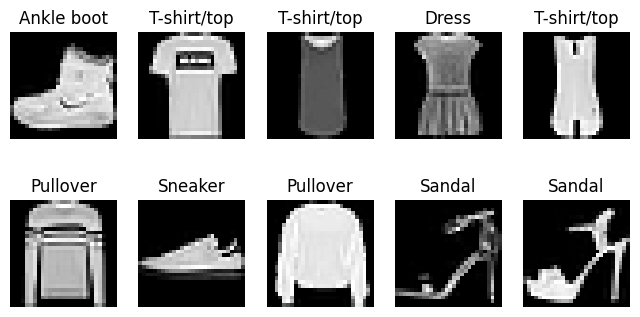

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Plot the data
def plot_digits(instances, labels, images_per_row=5):
    for i in range(len(instances)):
        idx = i // images_per_row
        idy = i % images_per_row 
        ax[idx, idy].imshow(instances[i].squeeze(), cmap="gray")
        ax[idx, idy].set_title(class_names[labels[i]])
        ax[idx, idy].axis("off")

fig, ax = plt.subplots(2, 5, figsize=(8, 4))
example_images = X_train[:10]
example_labels = y_train[:10]
plot_digits(example_images, example_labels, images_per_row=5)
plt.show()

# Use Keras to build a convolutional neural network for image classification

#### Construct all the layers in the convolutional neural network

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([                        #Input shape (28, 28, 1): one channel, each channel is 28x28
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),  
                                                         #Convolution layer, 32 channels, kernel size (3, 3), ReLU 
    keras.layers.MaxPooling2D((2,2)),                    #MaxPooling layer, pooling size (2, 2)
    keras.layers.Conv2D(64, (3, 3), activation="relu"),  #Convolution layer, 64 channels, kernel size (3, 3), ReLU 
    keras.layers.MaxPooling2D((2,2)),                    #MaxPooling layer, pooling size (2, 2)
    keras.layers.Flatten(),                              #Flatten all channels into a feature vector
    keras.layers.Dense(10, activation="softmax")         #Output layer, 10 neurons, softmax
])

In [10]:
model.layers

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_1, built=True>]

#### Display the model structure with parameters

In [11]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Set up some hyperparameters: use cross entropy loss, min-batch gradient descent, adam optimizer, and print out accruacy during training

In [12]:
model.compile(loss="sparse_categorical_crossentropy",    #Cross entropy loss function
              optimizer="adam",                          #Adam optimizer
              metrics=["accuracy"])                      #Using accuracy

#### Train the model: use 10 epochs, and display training loss, training accuracy, validation loss, and validation accuracy during model training

In [13]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7657 - loss: 0.6703 - val_accuracy: 0.8700 - val_loss: 0.3674
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8772 - loss: 0.3453 - val_accuracy: 0.8862 - val_loss: 0.3247
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8922 - loss: 0.2993 - val_accuracy: 0.8945 - val_loss: 0.3041
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9036 - loss: 0.2690 - val_accuracy: 0.8946 - val_loss: 0.2928
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9110 - loss: 0.2464 - val_accuracy: 0.8951 - val_loss: 0.2892
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9165 - loss: 0.2284 - val_accuracy: 0.8971 - val_loss: 0.2870
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9220 - loss: 0.2132 - val_accuracy: 0.8960 - val_loss: 0.2919
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9267 - loss: 0.1999 - 

#### Plot the training results

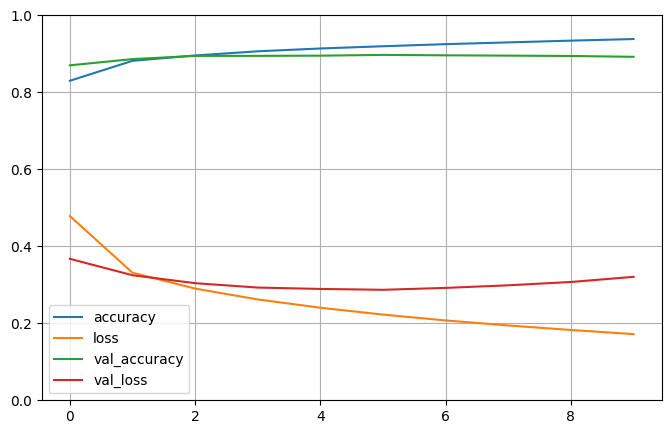

In [14]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Evaluate the trained convolutional neural network

#### Evaluate the train convolutional neural network using model.evaluation()

Here, we can use model.evaluation() directly to get the loss and accuracy on the test data. This will return two results, where the first one is test loss and the second one is the test accuracy.

In [15]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8916 - loss: 0.3296


[0.3205742835998535, 0.8920999765396118]

#### Evaluate the train convolutional neural network using accuracy and F1-score

In [16]:
y_proba = model.predict(X_test)
y_proba.round(2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.56, 0.  , 0.  ]], dtype=float32)

Prediction labels:

In [17]:
y_pred = np.argmax(y_proba, axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 7], dtype=int64)

#### Output the confusion matrix

In [18]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[817   1  13  20   7   0 136   0   6   0]
 [  3 981   0  11   2   0   3   0   0   0]
 [ 12   0 836  12  71   0  69   0   0   0]
 [  9   5   9 897  39   0  41   0   0   0]
 [  1   1  40  16 890   0  52   0   0   0]
 [  0   0   0   0   0 920   0  69   0  11]
 [ 90   1  61  24  98   0 719   0   7   0]
 [  0   0   0   0   0   1   0 995   0   4]
 [  4   1  10   4   4   1  13   6 957   0]
 [  1   0   0   0   0   4   0  86   0 909]]


#### Calculate accuracy, macro F1-score, and micro F1-score

In [19]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
macrof1 = f1_score(y_test, y_pred, average='macro')
microf1 = f1_score(y_test, y_pred, average='micro')
print('Accuracy: {:.2f}'.format(acc))
print('Macro F1-score: {:.2f}'.format(macrof1))
print('Micro F1-score: {:.2f}'.format(microf1))

Accuracy: 0.89
Macro F1-score: 0.89
Micro F1-score: 0.89
